In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
train= pd.read_csv('train.csv')

In [3]:
train

,Id,Tweet,following,followers,actions,is_retweet,location,Type
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,NaN,0.0,Chicago,Quality
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN,Quality
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,NaN,0.0,"Scotland, U.K",Quality
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam
...,...,...,...,...,...,...,...,...
11963,7866,11:11 meet harry,0.0,0.0,0.0,0.0,NaN,Quality
11964,7841,If BBC Food disappears the loss of knowledge w...,0.0,0.0,NaN,0.0,"London, N4",Quality
11965,9090,Look What Liberals Did to This Historic Monume...,0.0,2.0,1192.0,0.0,honeymoon ãve,Spam
11966,6818,"I uploaded a new track, ""Everyday Lite 1"", on ...",0.0,0.0,0.0,0.0,Mega Manila,Quality


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11968 entries, 0 to 11967
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          11968 non-null  int64  
 1   Tweet       11968 non-null  object 
 2   following   11823 non-null  float64
 3   followers   11952 non-null  float64
 4   actions     9195 non-null   float64
 5   is_retweet  11967 non-null  float64
 6   location    10317 non-null  object 
 7   Type        11968 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 748.1+ KB


In [5]:
train.describe()

,Id,following,followers,actions,is_retweet
count,11968.000000,1.182300e+04,1.195200e+04,9195.000000,11967.000000
mean,6292.273730,4.787110e+03,3.668763e+05,7314.563893,0.223949
std,3632.510153,3.158289e+04,3.973314e+06,16468.215132,0.416906
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,3150.750000,0.000000e+00,0.000000e+00,10.000000,0.000000
50%,6289.500000,5.100000e+01,8.415000e+02,1487.000000,0.000000
75%,9442.250000,3.635000e+03,1.328775e+04,7265.500000,0.000000
max,12598.000000,1.600000e+06,1.050000e+08,165865.000000,1.000000


In [6]:
train.Tweet[11964]

'If BBC Food disappears the loss of knowledge will be catastrophic - http://www.bbc.co.uk/food/recipes/rumandcola_72376\xa0…'

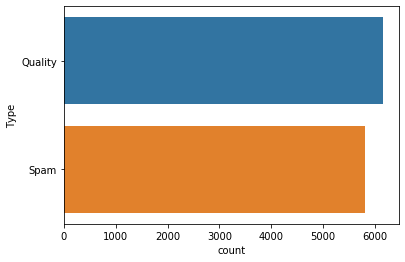

In [7]:
plt.figure(num=2)
sns.countplot(y= train['Type'])

Now if we observe the data carefully, we can easily see that usually in case of Quality messages, no. of followers is usually higher or equal to no. of following. So, I tried to predict the type of messages using this logic.

In [8]:
def greaterFollower(train):
    if train.followers>= train.following:
        return 'Quality'
    else:
        return 'Spam'
    
train['pred_Type']= train.apply(greaterFollower,axis=1)

In [9]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [10]:
print(classification_report(train['Type'], train.pred_Type))
print(confusion_matrix(train['Type'], train.pred_Type))

              precision    recall  f1-score   support

     Quality       0.63      0.96      0.76      6153
        Spam       0.91      0.39      0.55      5815

    accuracy                           0.69     11968
   macro avg       0.77      0.68      0.66     11968
weighted avg       0.77      0.69      0.66     11968

[[5936  217]
 [3528 2287]]


Already, without using any model, we have ann accuracy of approximately 70%. Although, recall of spam is very bad which affected our model's accuracy.


In [11]:
from nltk.corpus import stopwords
import string

In [12]:
stopwords= stopwords.words('english')

In [13]:
def text_process(str):
    a= ''.join([col for col in str.lower() if col not in string.punctuation])
    words= [word for word in a.split() if word not in stopwords]
    return words

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tf= TfidfVectorizer(analyzer= text_process,lowercase=True,smooth_idf=True).fit(train.Tweet)

In [16]:
tweet_text=  tf.transform(train.Tweet)
tweet_text.shape

(11968, 33256)

In [17]:
tweet_text.nnz/(11968*33256)*100
#Sparsity is 0.025%

0.025639949254462866

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

C:\Users\New\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\New\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\New\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\New\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
X_train,X_test,y_train,y_test= train_test_split(tweet_text, train.Type,test_size= 0.3)

In [20]:
mb= MultinomialNB().fit(X_train, y_train)

In [21]:
pred_valid= mb.predict(X_test)

In [22]:
print(classification_report(y_test,pred_valid))

              precision    recall  f1-score   support

     Quality       0.83      0.89      0.86      1864
        Spam       0.87      0.80      0.84      1727

    accuracy                           0.85      3591
   macro avg       0.85      0.85      0.85      3591
weighted avg       0.85      0.85      0.85      3591



Now when we trained the text data using tfidf vectorizer, the accuracy of our predictions shot up to 84% with significant imporvement in precision and recall of both Quality and Spam

In [23]:
train['is_loc']= train['location'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [24]:
train

,Id,Tweet,following,followers,actions,is_retweet,location,Type,pred_Type,is_loc
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,NaN,0.0,Chicago,Quality,Quality,1
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN,Quality,Quality,0
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,NaN,0.0,"Scotland, U.K",Quality,Quality,1
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam,Spam,1
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam,Spam,1
...,...,...,...,...,...,...,...,...,...,...
11963,7866,11:11 meet harry,0.0,0.0,0.0,0.0,NaN,Quality,Quality,0
11964,7841,If BBC Food disappears the loss of knowledge w...,0.0,0.0,NaN,0.0,"London, N4",Quality,Quality,1
11965,9090,Look What Liberals Did to This Historic Monume...,0.0,2.0,1192.0,0.0,honeymoon ãve,Spam,Quality,1
11966,6818,"I uploaded a new track, ""Everyday Lite 1"", on ...",0.0,0.0,0.0,0.0,Mega Manila,Quality,Quality,1


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11968 entries, 0 to 11967
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          11968 non-null  int64  
 1   Tweet       11968 non-null  object 
 2   following   11823 non-null  float64
 3   followers   11952 non-null  float64
 4   actions     9195 non-null   float64
 5   is_retweet  11967 non-null  float64
 6   location    10317 non-null  object 
 7   Type        11968 non-null  object 
 8   pred_Type   11968 non-null  object 
 9   is_loc      11968 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 935.1+ KB


In [26]:
train['is_action']= train.actions.apply(lambda x: 0  if pd.isnull(x) else 1)

In [27]:
train['actions'].fillna(-1,inplace=True)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11968 entries, 0 to 11967
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          11968 non-null  int64  
 1   Tweet       11968 non-null  object 
 2   following   11823 non-null  float64
 3   followers   11952 non-null  float64
 4   actions     11968 non-null  float64
 5   is_retweet  11967 non-null  float64
 6   location    10317 non-null  object 
 7   Type        11968 non-null  object 
 8   pred_Type   11968 non-null  object 
 9   is_loc      11968 non-null  int64  
 10  is_action   11968 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.0+ MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C0D8B5F08>,
      dtype=object)

<Figure size 864x360 with 0 Axes>

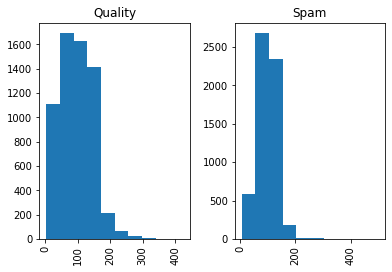

In [29]:
train['Length']= train.Tweet.apply(len)
plt.figure(figsize=(12,5))
train.hist(column='Length', by='Type')

Again, Quality messages have less words than spam messages.

In [30]:
train.drop('Id',inplace=True,axis=1)

In [31]:
train

,Tweet,following,followers,actions,is_retweet,location,Type,pred_Type,is_loc,is_action,Length
0,It's the everything else that's complicated. #...,0.0,11500.0,-1.0,0.0,Chicago,Quality,Quality,1,0,84
1,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,-1.0,0.0,NaN,Quality,Quality,0,0,139
2,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,-1.0,0.0,"Scotland, U.K",Quality,Quality,1,0,55
3,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam,Spam,1,1,105
4,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam,Spam,1,1,92
...,...,...,...,...,...,...,...,...,...,...,...
11963,11:11 meet harry,0.0,0.0,0.0,0.0,NaN,Quality,Quality,0,1,16
11964,If BBC Food disappears the loss of knowledge w...,0.0,0.0,-1.0,0.0,"London, N4",Quality,Quality,1,0,120
11965,Look What Liberals Did to This Historic Monume...,0.0,2.0,1192.0,0.0,honeymoon ãve,Spam,Quality,1,1,108
11966,"I uploaded a new track, ""Everyday Lite 1"", on ...",0.0,0.0,0.0,0.0,Mega Manila,Quality,Quality,1,1,165


In [32]:
X= train.drop('location', axis=1)

In [33]:
X.loc[X.following.isnull()].sort_values(by='followers',ascending=False).tail(40)

,Tweet,following,followers,actions,is_retweet,Type,pred_Type,is_loc,is_action,Length
1580,Message me if y'all want a job,NaN,0.0,-1.0,0.0,Quality,Spam,0,0,30
1568,#OneWildAssParty FRIDAY @ #ClubLaCura 18+\n\n$...,NaN,0.0,0.0,0.0,Quality,Spam,1,1,143
1353,andrea https://twitter.com/_dopehumanity_/stat...,NaN,0.0,0.0,0.0,Quality,Spam,1,1,69
3799,Thankshttps://twitter.com/fucktyler/status/732...,NaN,0.0,0.0,0.0,Quality,Spam,1,1,63
3813,"""Fuck a skinny girl"" is just as bad as saying ...",NaN,0.0,41.0,0.0,Quality,Spam,0,1,67
3845,Ay guess what you're permed qgi,NaN,0.0,0.0,0.0,Quality,Spam,1,1,31
3847,Blog : Top Smartphones to look forward - OPPO ...,NaN,0.0,0.0,0.0,Quality,Spam,0,1,111
6164,#Hawaii #Maui #Oahu #Kauai Three bombings in B...,NaN,0.0,0.0,0.0,Quality,Spam,1,1,107
6159,#NJ Guys Be Careful – You Can Get These Deadly...,NaN,0.0,0.0,0.0,Quality,Spam,1,1,114
1043,"Segment, co2 is low Great is the art of begin...",NaN,0.0,0.0,0.0,Quality,Spam,0,1,106


In [34]:
X.loc[X.followers.isnull()].sort_values(by='following',ascending=False).head(40)

,Tweet,following,followers,actions,is_retweet,Type,pred_Type,is_loc,is_action,Length
749,TY folks and keep up the great work!,0.0,NaN,-1.0,1.0,Quality,Spam,0,0,36
1335,I just checked in at Tire Kingdom with #mPLUSP...,0.0,NaN,0.0,0.0,Quality,Spam,0,1,92
1723,CandyBrides\nWe provide the Dating Service to ...,0.0,NaN,0.0,0.0,Quality,Spam,0,1,146
5879,"Lock the bathroom door, take out the teeth. \n...",0.0,NaN,-1.0,1.0,Quality,Spam,1,0,81
7768,tim im 6 '2 215 lbs. what size shirt should i ...,0.0,NaN,-1.0,0.0,Quality,Spam,0,0,65
8410,@PhiLLKross I'd like to hear #TEAM by Iggy Aza...,0.0,NaN,-1.0,0.0,Quality,Spam,0,0,63
9374,@UrbanFoodFest @HSBC_Sport @WorldRugby7s we ca...,0.0,NaN,-1.0,1.0,Quality,Spam,0,0,95
9673,The Story Of Us Macoy /nn\n\n#TSOURunaway,0.0,NaN,0.0,0.0,Quality,Spam,0,1,39
9854,The Story Of Us Macoy /ff \n\n#TSOURunaway,0.0,NaN,0.0,0.0,Quality,Spam,0,1,40
11472,Buy your favorite games at 90% off with the ne...,0.0,NaN,0.0,0.0,Quality,Spam,0,1,119


In [35]:
X.fillna(0,inplace=True)

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11968 entries, 0 to 11967
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tweet       11968 non-null  object 
 1   following   11968 non-null  float64
 2   followers   11968 non-null  float64
 3   actions     11968 non-null  float64
 4   is_retweet  11968 non-null  float64
 5   Type        11968 non-null  object 
 6   pred_Type   11968 non-null  object 
 7   is_loc      11968 non-null  int64  
 8   is_action   11968 non-null  int64  
 9   Length      11968 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 935.1+ KB


In [37]:
X_trial= X.fillna(0)

In [38]:
X_trial= X_trial.replace(['Quality','Spam'],[1,0])

In [39]:
print(X_trial[X_trial.Type==0].Tweet.apply(lambda x: 1 if 'https:' in x or 'http:' in x else 0).value_counts())
print(X_trial.Tweet.apply(lambda x: 1 if 'https:' in x or 'http:' in x else 0).value_counts())
X_trial.Tweet.apply(lambda x: 1 if 'https:' in x or 'http:' in x else 0).value_counts()


1    3827
0    1988
Name: Tweet, dtype: int64
1    6239
0    5729
Name: Tweet, dtype: int64


1    6239
0    5729
Name: Tweet, dtype: int64

So, if a tweet has https://t.co in their text, then according to training dataset it is a spam mail. As we can clearly see there is no such link in quality tweets. There are 3826 entries which have https://t.co in their tweets and they all are spam. This is a valuable observation and we can create a new feature from it.

In [40]:
X_trial['has_t_co']= X_trial.Tweet.apply(lambda x: 1 if 'https://t.co' in x or 'http://t.co' in x else 0)

In [41]:
X_trial['has_link']= X_trial.Tweet.apply(lambda x: 1 if 'https:' in x or 'http:' in x else 0)

In [42]:
X_trial

,Tweet,following,followers,actions,is_retweet,Type,pred_Type,is_loc,is_action,Length,has_t_co,has_link
0,It's the everything else that's complicated. #...,0.0,11500.0,-1.0,0.0,1,1,1,0,84,0,0
1,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,-1.0,0.0,1,1,0,0,139,0,0
2,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,-1.0,0.0,1,1,1,0,55,0,1
3,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,0,0,1,1,105,1,1
4,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,0,0,1,1,92,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11963,11:11 meet harry,0.0,0.0,0.0,0.0,1,1,0,1,16,0,0
11964,If BBC Food disappears the loss of knowledge w...,0.0,0.0,-1.0,0.0,1,1,1,0,120,0,1
11965,Look What Liberals Did to This Historic Monume...,0.0,2.0,1192.0,0.0,0,1,1,1,108,1,1
11966,"I uploaded a new track, ""Everyday Lite 1"", on ...",0.0,0.0,0.0,0.0,1,1,1,1,165,0,1


In [43]:
X= X_trial.drop(['Tweet', 'Type', 'pred_Type'],axis=1)
y= X_trial['Type']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

,following,followers,actions,is_retweet,is_loc,is_action,Length,has_t_co,has_link
6196,3651.0,4368.0,6066.0,1.0,1,1,33,0,0
6940,0.0,59200000.0,-1.0,0.0,1,0,140,0,0
1043,0.0,0.0,0.0,0.0,0,1,106,0,1
2908,1939.0,2460.0,14348.0,1.0,1,1,117,1,1
6461,0.0,114.0,2550.0,1.0,1,1,57,0,0
...,...,...,...,...,...,...,...,...,...
11284,2109.0,3488.0,1795.0,0.0,1,1,74,1,1
5191,8494.0,19039.0,8623.0,0.0,1,1,108,1,1
5390,4732.0,14436.0,14186.0,0.0,1,1,71,0,0
860,12800.0,46600.0,-1.0,0.0,1,0,137,0,1


In [76]:
from sklearn.ensemble import RandomForestClassifier
rr= RandomForestClassifier(n_estimators=300, verbose =1)
rr.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.4s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=False)

In [244]:
pred2= rr.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


In [245]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      1.00      1.00      2018

    accuracy                           1.00      3950
   macro avg       1.00      1.00      1.00      3950
weighted avg       1.00      1.00      1.00      3950



So, our model performs extremely well on the validation set with 100% accuracy and a f1 score of 1

In [77]:
test= pd.read_csv('test.csv')

In [78]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          630 non-null    int64  
 1   Tweet       630 non-null    object 
 2   following   623 non-null    float64
 3   followers   630 non-null    int64  
 4   actions     483 non-null    float64
 5   is_retweet  630 non-null    int64  
 6   location    550 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ KB


,Id,Tweet,following,followers,actions,is_retweet,location
0,0,Obama Criminal Enterprise Collapsing https://...,10.0,4,1214.0,0,Nairobi
1,1,I only learned to dream in sound #love,63.0,55,508.0,0,england
2,2,Cause I ain't trying to out here thinking you ...,0.0,0,0.0,0,NaN
3,3,When will they get that it's about #Liberty ? ...,2310.0,2736,32188.0,1,The Snow Forest
4,4,GM UAW workers to receive profit-sharing up to...,696.0,176,713.0,1,510502


In [79]:
test['is_loc']= test['location'].apply(lambda x: 0 if pd.isnull(x) else 1)
test['is_action']= test['actions'].apply(lambda x: 0 if pd.isnull(x) else 1)
test['Length']= test['Tweet'].apply(len)
test['has_t_co']= test.Tweet.apply(lambda x: 1 if 'https://t.co' in x or 'http://t.co' in x else 0)
test['has_link']= test.Tweet.apply(lambda x: 1 if 'https:' in x or 'http:' in x else 0)

In [80]:
test

,Id,Tweet,following,followers,actions,is_retweet,location,is_loc,is_action,Length,has_t_co,has_link
0,0,Obama Criminal Enterprise Collapsing https://...,10.0,4,1214.0,0,Nairobi,1,1,128,1,1
1,1,I only learned to dream in sound #love,63.0,55,508.0,0,england,1,1,39,0,0
2,2,Cause I ain't trying to out here thinking you ...,0.0,0,0.0,0,NaN,0,1,50,0,0
3,3,When will they get that it's about #Liberty ? ...,2310.0,2736,32188.0,1,The Snow Forest,1,1,85,1,1
4,4,GM UAW workers to receive profit-sharing up to...,696.0,176,713.0,1,510502,1,1,78,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
625,625,Elementary Evacuates Due to Nearby Gas Leak ht...,8868.0,19620,17763.0,0,United States,1,1,91,1,1
626,626,"""My Shot"" from Hamilton",0.0,0,NaN,1,NaN,0,0,23,0,0
627,627,hi @Uber my driver pulled into a random parkin...,NaN,0,NaN,0,kitche,1,0,140,0,0
628,628,OMG Dont know then how to treat my family on ...,42.0,39,486.0,0,United States,1,1,110,1,1


In [81]:
X_test= test.drop(['Id','Tweet','location'],axis=1)
X_test.actions.fillna(-1,inplace=True)
X_test.fillna(0,inplace=True)


In [83]:
pred4= rr.predict_proba(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


In [288]:
submit= test[['Id','Type']]
submit['Type']= submit.Type.replace([0,1],['Spam','Quality'])
submit

C:\Users\New\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Id,Type
0,0,Spam
1,1,Spam
2,2,Quality
3,3,Spam
4,4,Spam
...,...,...
625,625,Spam
626,626,Quality
627,627,Quality
628,628,Spam


In [289]:
submit.to_csv('submit.csv')

In [57]:
submit= pd.read_csv('submit.csv')

In [51]:
tweet_test= tf.transform(test['Tweet'])

In [64]:
pred3= mb.predict(tweet_test)
pred3

array(['Spam', 'Quality', 'Quality', 'Spam', 'Spam', 'Spam', 'Spam',
       'Quality', 'Quality', 'Quality', 'Quality', 'Spam', 'Spam', 'Spam',
       'Spam', 'Quality', 'Quality', 'Spam', 'Spam', 'Spam', 'Spam',
       'Quality', 'Spam', 'Quality', 'Quality', 'Spam', 'Quality',
       'Quality', 'Quality', 'Spam', 'Quality', 'Quality', 'Spam',
       'Quality', 'Spam', 'Spam', 'Quality', 'Spam', 'Spam', 'Spam',
       'Spam', 'Quality', 'Quality', 'Spam', 'Spam', 'Quality', 'Quality',
       'Spam', 'Quality', 'Quality', 'Spam', 'Quality', 'Quality',
       'Quality', 'Quality', 'Quality', 'Quality', 'Spam', 'Spam',
       'Quality', 'Quality', 'Quality', 'Quality', 'Quality', 'Quality',
       'Quality', 'Spam', 'Spam', 'Quality', 'Quality', 'Spam', 'Spam',
       'Quality', 'Quality', 'Quality', 'Quality', 'Spam', 'Spam', 'Spam',
       'Quality', 'Quality', 'Spam', 'Quality', 'Quality', 'Quality',
       'Quality', 'Quality', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam',
       'Quality'

In [60]:
(pred3==submit['Category']).value_counts()

True     549
False     81
Name: Category, dtype: int64

In [65]:
print(classification_report(pred3,submit.Category))

              precision    recall  f1-score   support

     Quality       0.90      0.86      0.88       341
        Spam       0.84      0.88      0.86       289

    accuracy                           0.87       630
   macro avg       0.87      0.87      0.87       630
weighted avg       0.87      0.87      0.87       630



In [63]:
test

,Id,Tweet,following,followers,actions,is_retweet,location
0,0,Obama Criminal Enterprise Collapsing https://...,10.0,4,1214.0,0,Nairobi
1,1,I only learned to dream in sound #love,63.0,55,508.0,0,england
2,2,Cause I ain't trying to out here thinking you ...,0.0,0,0.0,0,NaN
3,3,When will they get that it's about #Liberty ? ...,2310.0,2736,32188.0,1,The Snow Forest
4,4,GM UAW workers to receive profit-sharing up to...,696.0,176,713.0,1,510502
...,...,...,...,...,...,...,...
625,625,Elementary Evacuates Due to Nearby Gas Leak ht...,8868.0,19620,17763.0,0,United States
626,626,"""My Shot"" from Hamilton",0.0,0,NaN,1,NaN
627,627,hi @Uber my driver pulled into a random parkin...,NaN,0,NaN,0,kitche
628,628,OMG Dont know then how to treat my family on ...,42.0,39,486.0,0,United States


In [86]:
tr= mb.predict_proba(tweet_test)

In [ ]:
pred4

In [85]:
(tr+pred4)/2

NameError: name 'tr' is not defined